# GenuineEye: RealFake Classifer

# 1. Setting up Environment

In [1]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[]

In [4]:
import cv2
import imghdr

In [5]:
data_dir = 'data' 

In [6]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

# 3. Loading Dataset

In [7]:
import numpy as np
from matplotlib import pyplot as plt

In [8]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 2020 files belonging to 2 classes.


In [9]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [10]:
data_iterator = data.as_numpy_iterator()

In [11]:
batch = data_iterator.next()

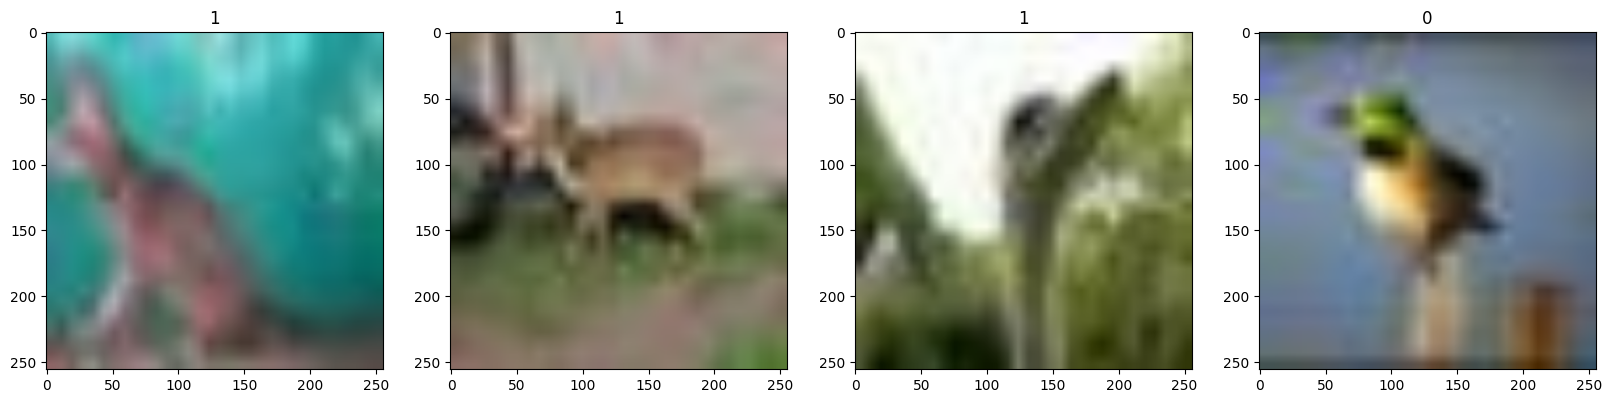

In [12]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Upscaleing Data

In [13]:
data = data.map(lambda x,y: (x/255, y))

In [14]:
data.as_numpy_iterator().next()

(array([[[[0.17254902, 0.3137255 , 0.50980395],
          [0.17254902, 0.3137255 , 0.50980395],
          [0.17254902, 0.3137255 , 0.50980395],
          ...,
          [0.16078432, 0.23921569, 0.47058824],
          [0.16078432, 0.23921569, 0.47058824],
          [0.16078432, 0.23921569, 0.47058824]],
 
         [[0.17254902, 0.3137255 , 0.50980395],
          [0.17254902, 0.3137255 , 0.50980395],
          [0.17254902, 0.3137255 , 0.50980395],
          ...,
          [0.16078432, 0.23921569, 0.47058824],
          [0.16078432, 0.23921569, 0.47058824],
          [0.16078432, 0.23921569, 0.47058824]],
 
         [[0.17254902, 0.3137255 , 0.50980395],
          [0.17254902, 0.3137255 , 0.50980395],
          [0.17254902, 0.3137255 , 0.50980395],
          ...,
          [0.16078432, 0.23921569, 0.47058824],
          [0.16078432, 0.23921569, 0.47058824],
          [0.16078432, 0.23921569, 0.47058824]],
 
         ...,
 
         [[0.10588235, 0.12156863, 0.16470589],
          [0.10588